In [ ]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

#from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image



In [ ]:
# dense2f= tensorflow.keras.applications.densenet.DenseNet121(
#     input_shape= (224,224,3), weights='imagenet', include_top=True
# )
model_d=DenseNet201(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(6,activation='softmax')(x) #FC-layer

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
for layer in model.layers[:-8]:
   layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

data=[]
labels=[]
random.seed(42)
imagePaths = sorted(list(os.listdir("../content/drive/My Drive/Colab Notebooks/datasets/ausnake/")))
random.shuffle(imagePaths)
print(imagePaths)

for img in imagePaths:
    path=sorted(list(os.listdir("../content/drive/My Drive/Colab Notebooks/datasets/ausnake/"+img)))
    for i in path:
        image = cv2.imread("../content/drive/My Drive/Colab Notebooks/datasets/ausnake/"+img+'/'+i)
        image = cv2.resize(image, (224,224))
        image = img_to_array(image)
        data.append(image)
        l = label = img
        labels.append(l)



['NotechisScutatus', 'DendrelaphisPunctulatus', 'MoreliaSpilota', 'PseudechisPorphyriacus', 'BoigaIrregularis', 'PseudonajaTextilis']


In [ ]:

data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)
mlb = LabelBinarizer()
labels = mlb.fit_transform(labels)
print(labels[0])

[0 0 0 1 0 0]


In [ ]:
(xtrain,xtest,ytrain,ytest)=train_test_split(data,labels,test_size=0.2,random_state=42)
print(xtrain.shape, xtest.shape)

(2300, 224, 224, 3) (575, 224, 224, 3)


In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('../content/drive/MyDrive/Colab Notebooks/datasets/model.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)


datagen.fit(xtrain)
# Fits-the-model
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128),
               steps_per_epoch=xtrain.shape[0] //224,
               epochs=300,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

Epoch 1/300
10/10 - 98s - loss: 2.3078 - accuracy: 0.3422 - val_loss: 1.5356 - val_accuracy: 0.3909

Epoch 00001: val_loss improved from inf to 1.53563, saving model to ../content/drive/MyDrive/Colab Notebooks/datasets/model.h5
Epoch 2/300
10/10 - 40s - loss: 1.7792 - accuracy: 0.4812 - val_loss: 1.1717 - val_accuracy: 0.5604

Epoch 00002: val_loss improved from 1.53563 to 1.17169, saving model to ../content/drive/MyDrive/Colab Notebooks/datasets/model.h5
Epoch 3/300
10/10 - 46s - loss: 1.5575 - accuracy: 0.5290 - val_loss: 1.0679 - val_accuracy: 0.6000

Epoch 00003: val_loss improved from 1.17169 to 1.06789, saving model to ../content/drive/MyDrive/Colab Notebooks/datasets/model.h5
Epoch 4/300
10/10 - 40s - loss: 1.4783 - accuracy: 0.5329 - val_loss: 0.9963 - val_accuracy: 0.6204

Epoch 00004: val_loss improved from 1.06789 to 0.99635, saving model to ../content/drive/MyDrive/Colab Notebooks/datasets/model.h5
Epoch 5/300
10/10 - 40s - loss: 1.3304 - accuracy: 0.5721 - val_loss: 1.0030

In [ ]:
ypred = model.predict(xtest)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(ytest[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 575 	accurately-predicted-data: 363 	 wrongly-predicted-data:  212
Accuracy: 63.13 %


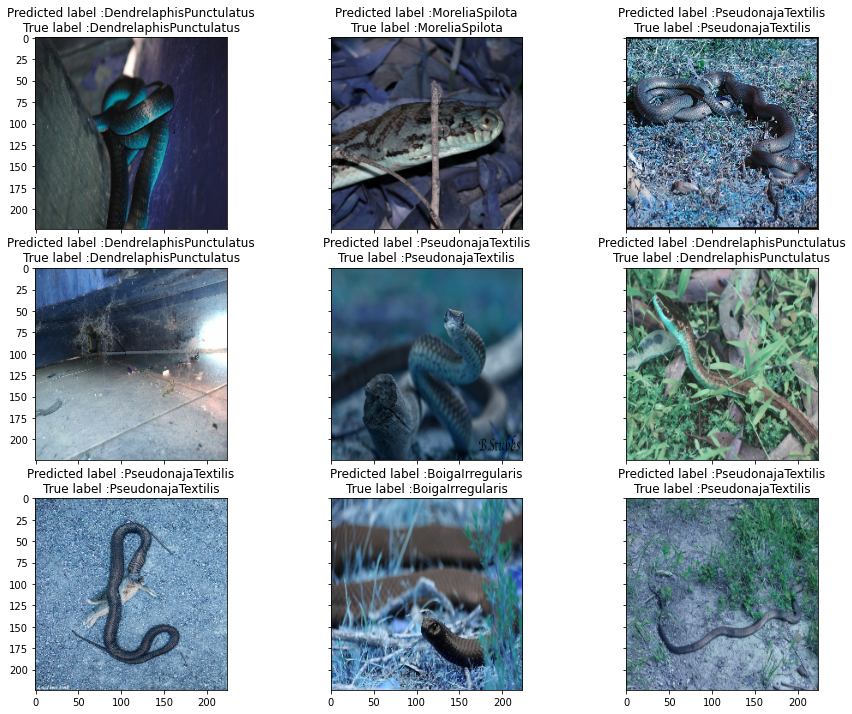

In [ ]:
label=['NotechisScutatus', 'DendrelaphisPunctulatus', 'MoreliaSpilota', 'PseudechisPorphyriacus', 'BoigaIrregularis', 'PseudonajaTextilis']
imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(xtest[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(ytest[imidx[n]])]))
            n += 1

plt.show()

Text(0.5, 145.31999999999996, 'Predicted')

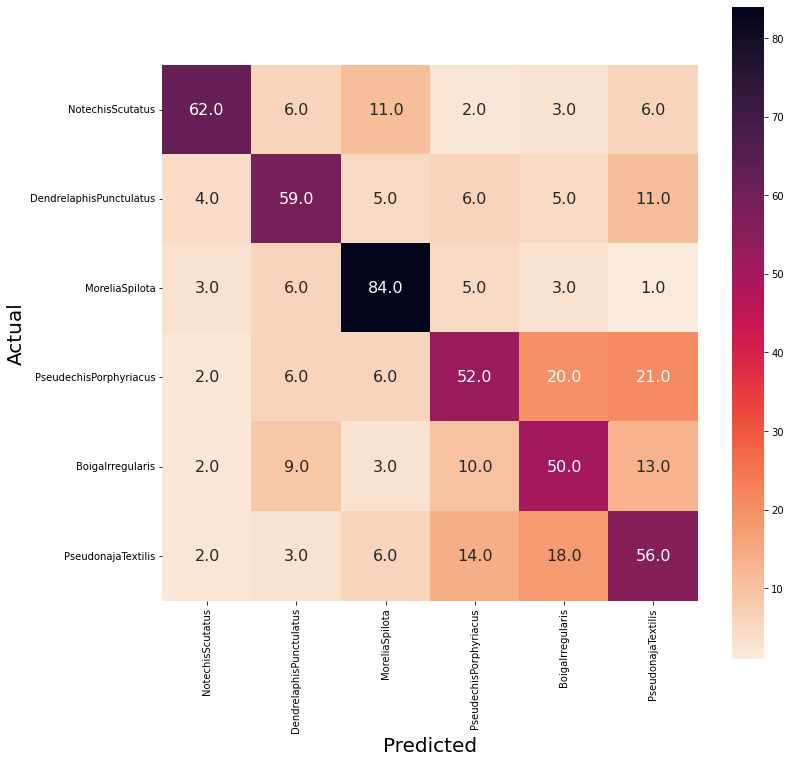

In [ ]:
Ypred = model.predict(xtest)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(ytest, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)